<center>朱强强</center>
<center>17064001</center>
<center>应用统计学</center>

数据来源于kaggle数据集中公开的乳腺癌诊断数据，使用sklearn中的`KNeighborsClassifier`方法做数据分类和预测。
数据链接：https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### 数据预处理

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data.csv")
print("数据的维度是: ", data.shape)
data.head(5)

数据的维度是:  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
col = data.columns  # 查看特征变量
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


从上面数据我们可以看出，id对我们的分析并无实质作用，diagnosis是我们的目标变量，最后一列的unnamed:32全是空值。我们将diagnosis这一列提取出来，然后将这三列删除。

In [4]:
y = data.diagnosis
feature_elimination_list = ['id', 'diagnosis', 'Unnamed: 32']
x = data.drop(feature_elimination_list, axis=1)
print("新数据的维度: ", x.shape)
x.head(5)

新数据的维度:  (569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


对目标变量进行大致的分析。

良性的数量:  357
恶性的数量:  212
良性的比重:  0.6274165202108963
恶性的比重:  0.37258347978910367


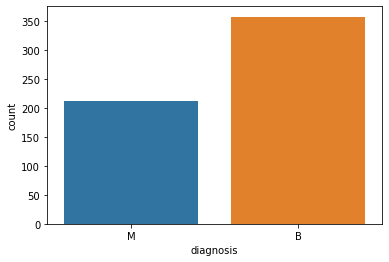

In [5]:
ax = sns.countplot(y, label="Count")
B_num, M_num = y.value_counts()
B_pct = B_num / len(y)
M_pct = M_num / len(y)
print("良性的数量: ", B_num)
print("恶性的数量: ", M_num)
print("良性的比重: ", B_pct)
print("恶性的比重: ", M_pct)

**对数据进行0-1标准化处理**

In [6]:
def min_max_normalize(x):
    return (x - x.min())/(x.max() - x.min())

In [7]:
for col in x.columns[0:31]:
    x[col] = min_max_normalize(x[col])

### 特征工程

从上面我们知道，即使已经删除了目标变量和两个无效变量，我们还是有30个变量，所以我们需要删掉一些变量。    
我们绘制变量之间的相关系数图，对于那些相关系数为1的变量，只保留一个即可。

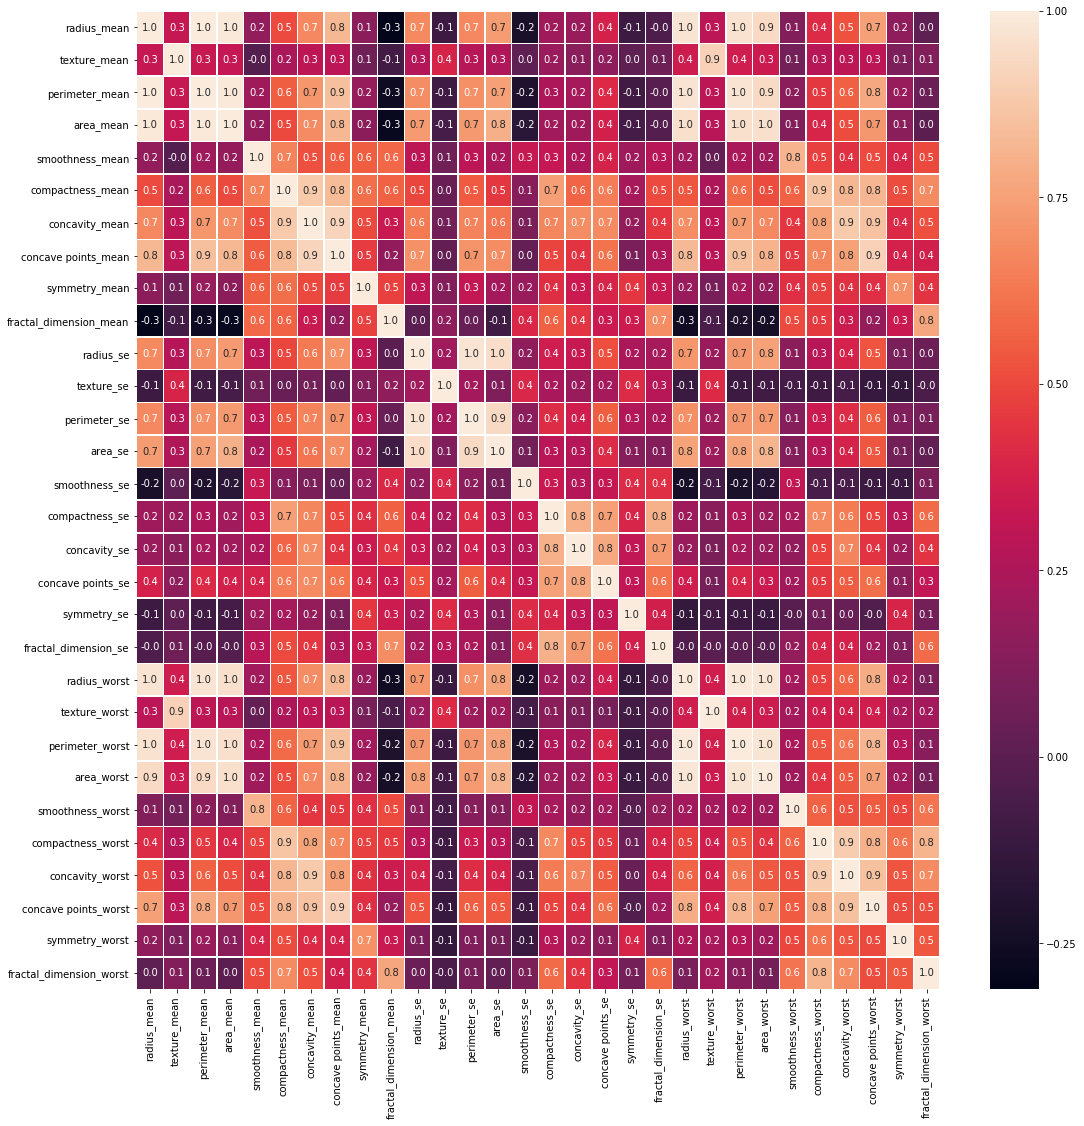

In [8]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

从上图我们看到，radius_mean, perimater_mean, area_mean等变量之间的相关系数为1，我们保留一个radius_mean变量即可。   
其他变量也做上述处理。drop_list1列表里面就是我们要删除的特征变量。

In [9]:
drop_list1 = ['perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst',
              'perimeter_worst', 'compactness_worst', 'concave points_worst', 'compactness_se', 'concave points_se', 'texture_worst', 
              'area_worst']
x_new = x.drop(drop_list1, axis=1 ) 
x_new.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864
1,0.643144,0.272574,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878
2,0.601496,0.390260,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433
3,0.210090,0.360839,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711
4,0.629893,0.156578,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595


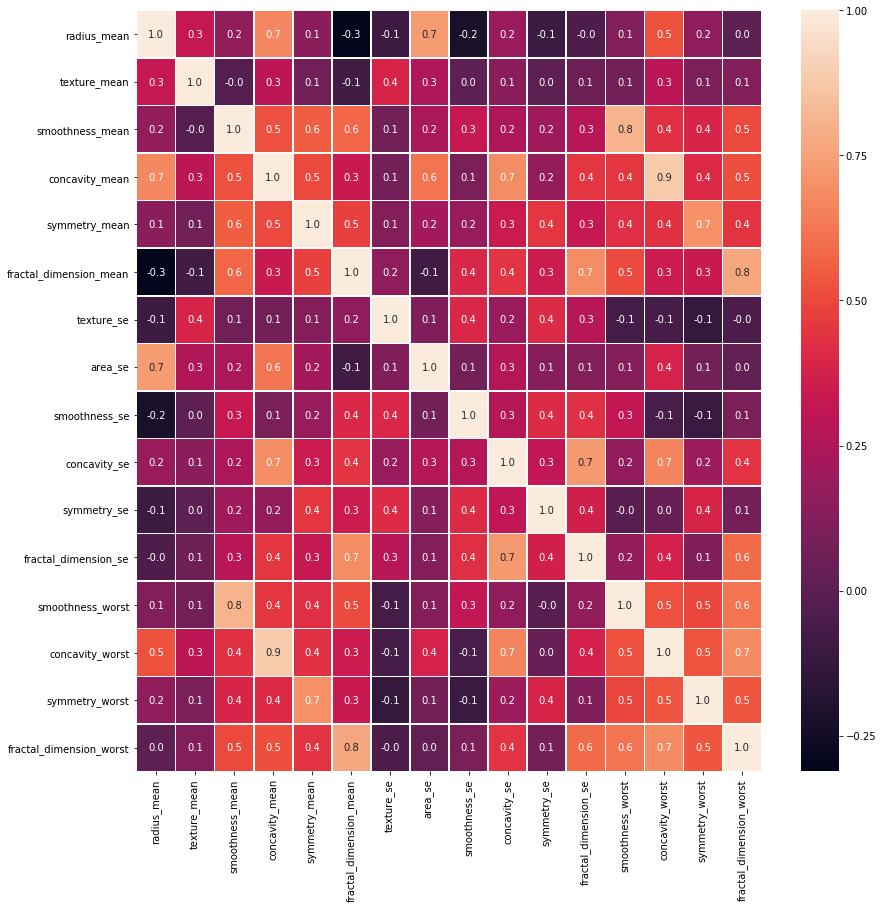

In [10]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_new.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

### 建立模型

对于该数据集，我们划分70%为训练集，30%为测试集。然后我们需要验证一下训练集和测试集中B和M的比例是否接近，只有两者比例接近，训练出来的模型才有意义。

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))

B    0.625628
M    0.374372
Name: diagnosis, dtype: float64
B    0.631579
M    0.368421
Name: diagnosis, dtype: float64


从上面数据我们可以看到，在B和M在测试集和训练集中的比例都比较接近，k以开始拟合模型。

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 21)
knn_model.fit(x_train, y_train)
y_test_pred = knn_model.predict(x_test)

              precision    recall  f1-score   support

           B       0.94      0.97      0.95       108
           M       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy is:  0.9415204678362573


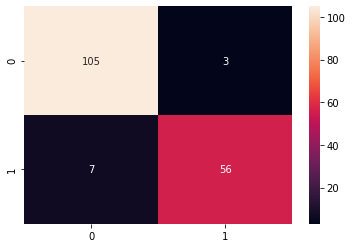

In [13]:
from sklearn import metrics
print (metrics.classification_report(y_test, y_test_pred))
model_accuracy = metrics.accuracy_score(y_test, knn_model.predict(x_test))
print('Accuracy is: ', model_accuracy)
cm = metrics.confusion_matrix(y_test, knn_model.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

由上面的结果我们可以看出，当k=21时，k近邻模型的精确度达到了94.15%。下面我们看一下当k不同取值是模型的精确度。

In [14]:
k_list = [i for i in range(1, 30, 2)]
for k in k_list:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train, y_train)

    y_test_pred = knn_model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    confusion_mat = metrics.confusion_matrix(y_test, y_test_pred)
    
    print ("k = ",k)
    print ("\t正确率: ", '%.2f' % (accuracy * 100) + "%")
    print ("\t假良性：",confusion_mat[0, 1])
    print ("","\t假恶性：",confusion_mat[1, 0])

k =  1
	正确率:  93.57%
	假良性： 7
 	假恶性： 4
k =  3
	正确率:  94.74%
	假良性： 4
 	假恶性： 5
k =  5
	正确率:  94.15%
	假良性： 5
 	假恶性： 5
k =  7
	正确率:  94.15%
	假良性： 5
 	假恶性： 5
k =  9
	正确率:  93.57%
	假良性： 4
 	假恶性： 7
k =  11
	正确率:  92.98%
	假良性： 5
 	假恶性： 7
k =  13
	正确率:  94.15%
	假良性： 4
 	假恶性： 6
k =  15
	正确率:  94.74%
	假良性： 3
 	假恶性： 6
k =  17
	正确率:  94.74%
	假良性： 3
 	假恶性： 6
k =  19
	正确率:  94.15%
	假良性： 3
 	假恶性： 7
k =  21
	正确率:  94.15%
	假良性： 3
 	假恶性： 7
k =  23
	正确率:  94.74%
	假良性： 2
 	假恶性： 7
k =  25
	正确率:  94.15%
	假良性： 2
 	假恶性： 8
k =  27
	正确率:  94.15%
	假良性： 2
 	假恶性： 8
k =  29
	正确率:  94.74%
	假良性： 2
 	假恶性： 7


### 模型优化

使用Z-score标准化处理

In [15]:
from sklearn import preprocessing
x_zscore = pd.DataFrame(preprocessing.scale(x), columns = x.columns)
x_zscore.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_zscore, y, test_size=0.3, random_state=42)
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))

B    0.625628
M    0.374372
Name: diagnosis, dtype: float64
B    0.631579
M    0.368421
Name: diagnosis, dtype: float64


In [17]:
k_list = [i for i in range(1, 30, 2)]
for k in k_list:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train, y_train)

    y_test_pred = knn_model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    confusion_mat = metrics.confusion_matrix(y_test, y_test_pred)
    
    print ("k = ",k)
    print ("\t正确率: ", '%.2f' % (accuracy * 100) + "%")
    print ("\t假阴性：",confusion_mat[0,1])
    print ("","\t假阳性：",confusion_mat[1,0])

k =  1
	正确率:  95.32%
	假阴性： 3
 	假阳性： 5
k =  3
	正确率:  95.91%
	假阴性： 3
 	假阳性： 4
k =  5
	正确率:  95.91%
	假阴性： 3
 	假阳性： 4
k =  7
	正确率:  95.91%
	假阴性： 3
 	假阳性： 4
k =  9
	正确率:  97.08%
	假阴性： 2
 	假阳性： 3
k =  11
	正确率:  95.91%
	假阴性： 2
 	假阳性： 5
k =  13
	正确率:  95.91%
	假阴性： 2
 	假阳性： 5
k =  15
	正确率:  95.32%
	假阴性： 2
 	假阳性： 6
k =  17
	正确率:  95.32%
	假阴性： 2
 	假阳性： 6
k =  19
	正确率:  95.32%
	假阴性： 1
 	假阳性： 7
k =  21
	正确率:  95.91%
	假阴性： 1
 	假阳性： 6
k =  23
	正确率:  95.32%
	假阴性： 1
 	假阳性： 7
k =  25
	正确率:  95.32%
	假阴性： 1
 	假阳性： 7
k =  27
	正确率:  95.32%
	假阴性： 1
 	假阳性： 7
k =  29
	正确率:  95.32%
	假阴性： 1
 	假阳性： 7


由上面结果我们可以看出经过Z-score标准化处理的数据拟合的模型更优。当k=21时，模型精确度为95.91%，假阴性只有1人。